In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir("/Users/anon/GitHubRepos/Kaggle/GraduateAdmissions/Data/")

In [4]:
graduate_data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [6]:
graduate_data.shape

(500, 9)

### A quick description of the dataset features
GRE Score and TOEFL scores are self explanatory.
Rating of the University to which the application is being made (am assuming 5 is good)
SOP and LOR are Statement of Purpose and Letter of Recommendation respectively. Their goodness is quantified in a scale upto 5 (highest)
CGPA is the grade in the undergraduate studies (10 being highest)
Research experience is binary - Either yes (1) or no (0).
Target variable is the probability of admit (0 to 1)

In [7]:
graduate_data.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [8]:
## Dropping the Serial No column
graduate_data.drop(columns = 'Serial No.', inplace = True)

In [10]:
## check for missing values
## turns our there aren't any
graduate_data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Bi-variate relationship between the independent variables and the target
Pretty much conforms to established notions of the influence of various independent factors on the chances of admit.
- Higher the GRE and TOEFl scores - higher the chances of admit. 
- Better undergraduate University rating, better the chances of admit as is the case with SOP and LOR.
- Undergraduate CGPA clearly has a strong impact on the chances of admit - but the same cannot be said about the research experience.

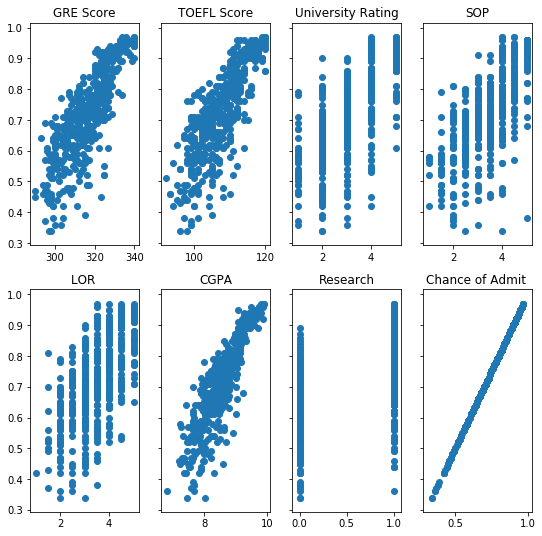

In [23]:
fig, ax = plt.subplots(2,4, sharey = 'row')
fig.set_size_inches(9,9)

k = 0
for i in range(0,2):
    for j in range(0,4):
        ax[i,j].scatter(graduate_data.iloc[0:,k],graduate_data.iloc[:,7])
        ax[i,j].set_title(graduate_data.columns[k])
        k += 1
        #print(k)
        
plt.show()


### Checking for correlation between variables

Some quick observations from the correlation plot:

- There is no negative correlation between any of the variables
- GRE scores and TOEFL scores are highly correlated
- GRE score has just a weak correlation with LOR and Research experience
- I was expecting a high correlation between LOR and CGPA - but not really the case
- More than GRE/ TOEFL, chances of admit is highly correlated with CGPA. Least correlated with Research experience

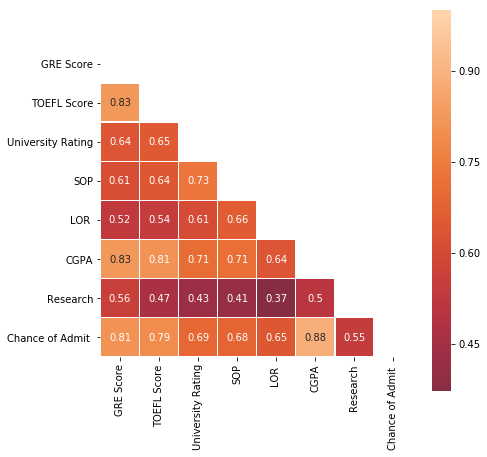

In [30]:
fig = plt.figure(figsize = (7,7))

corr_graduate = graduate_data.corr()
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
mask = np.zeros_like(corr_graduate, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
sns.heatmap(corr_back, mask = mask, center=0, annot = True, square=True, linewidths=.5)

plt.show()